<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/15_Okt_2024_home_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import *
from sklearn.tree import *
from sklearn.metrics import *
from sklearn.datasets import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.model_selection import *
import sklearn.tree as tree

In [16]:
df = pd.read_csv('train.csv').drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1).dropna()
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.25


In [17]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.25


In [30]:
def show_tree(model, X, class_name, figsize=(30,20)):
  plt.figure(figsize=figsize)
  tree.plot_tree(model,
                feature_names=X.columns.tolist(),
                class_names=class_name,
                filled=True,
                rounded=True,
                fontsize=14)
  return plt.show()

In [26]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=6, random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

y_score = model.predict_proba(X_test)[:, 1]

roc = roc_auc_score(y_test, y_score)


print('Acc', acc)
print('ROC AUC', roc)

Acc 0.7412587412587412
ROC AUC 0.7827380952380951


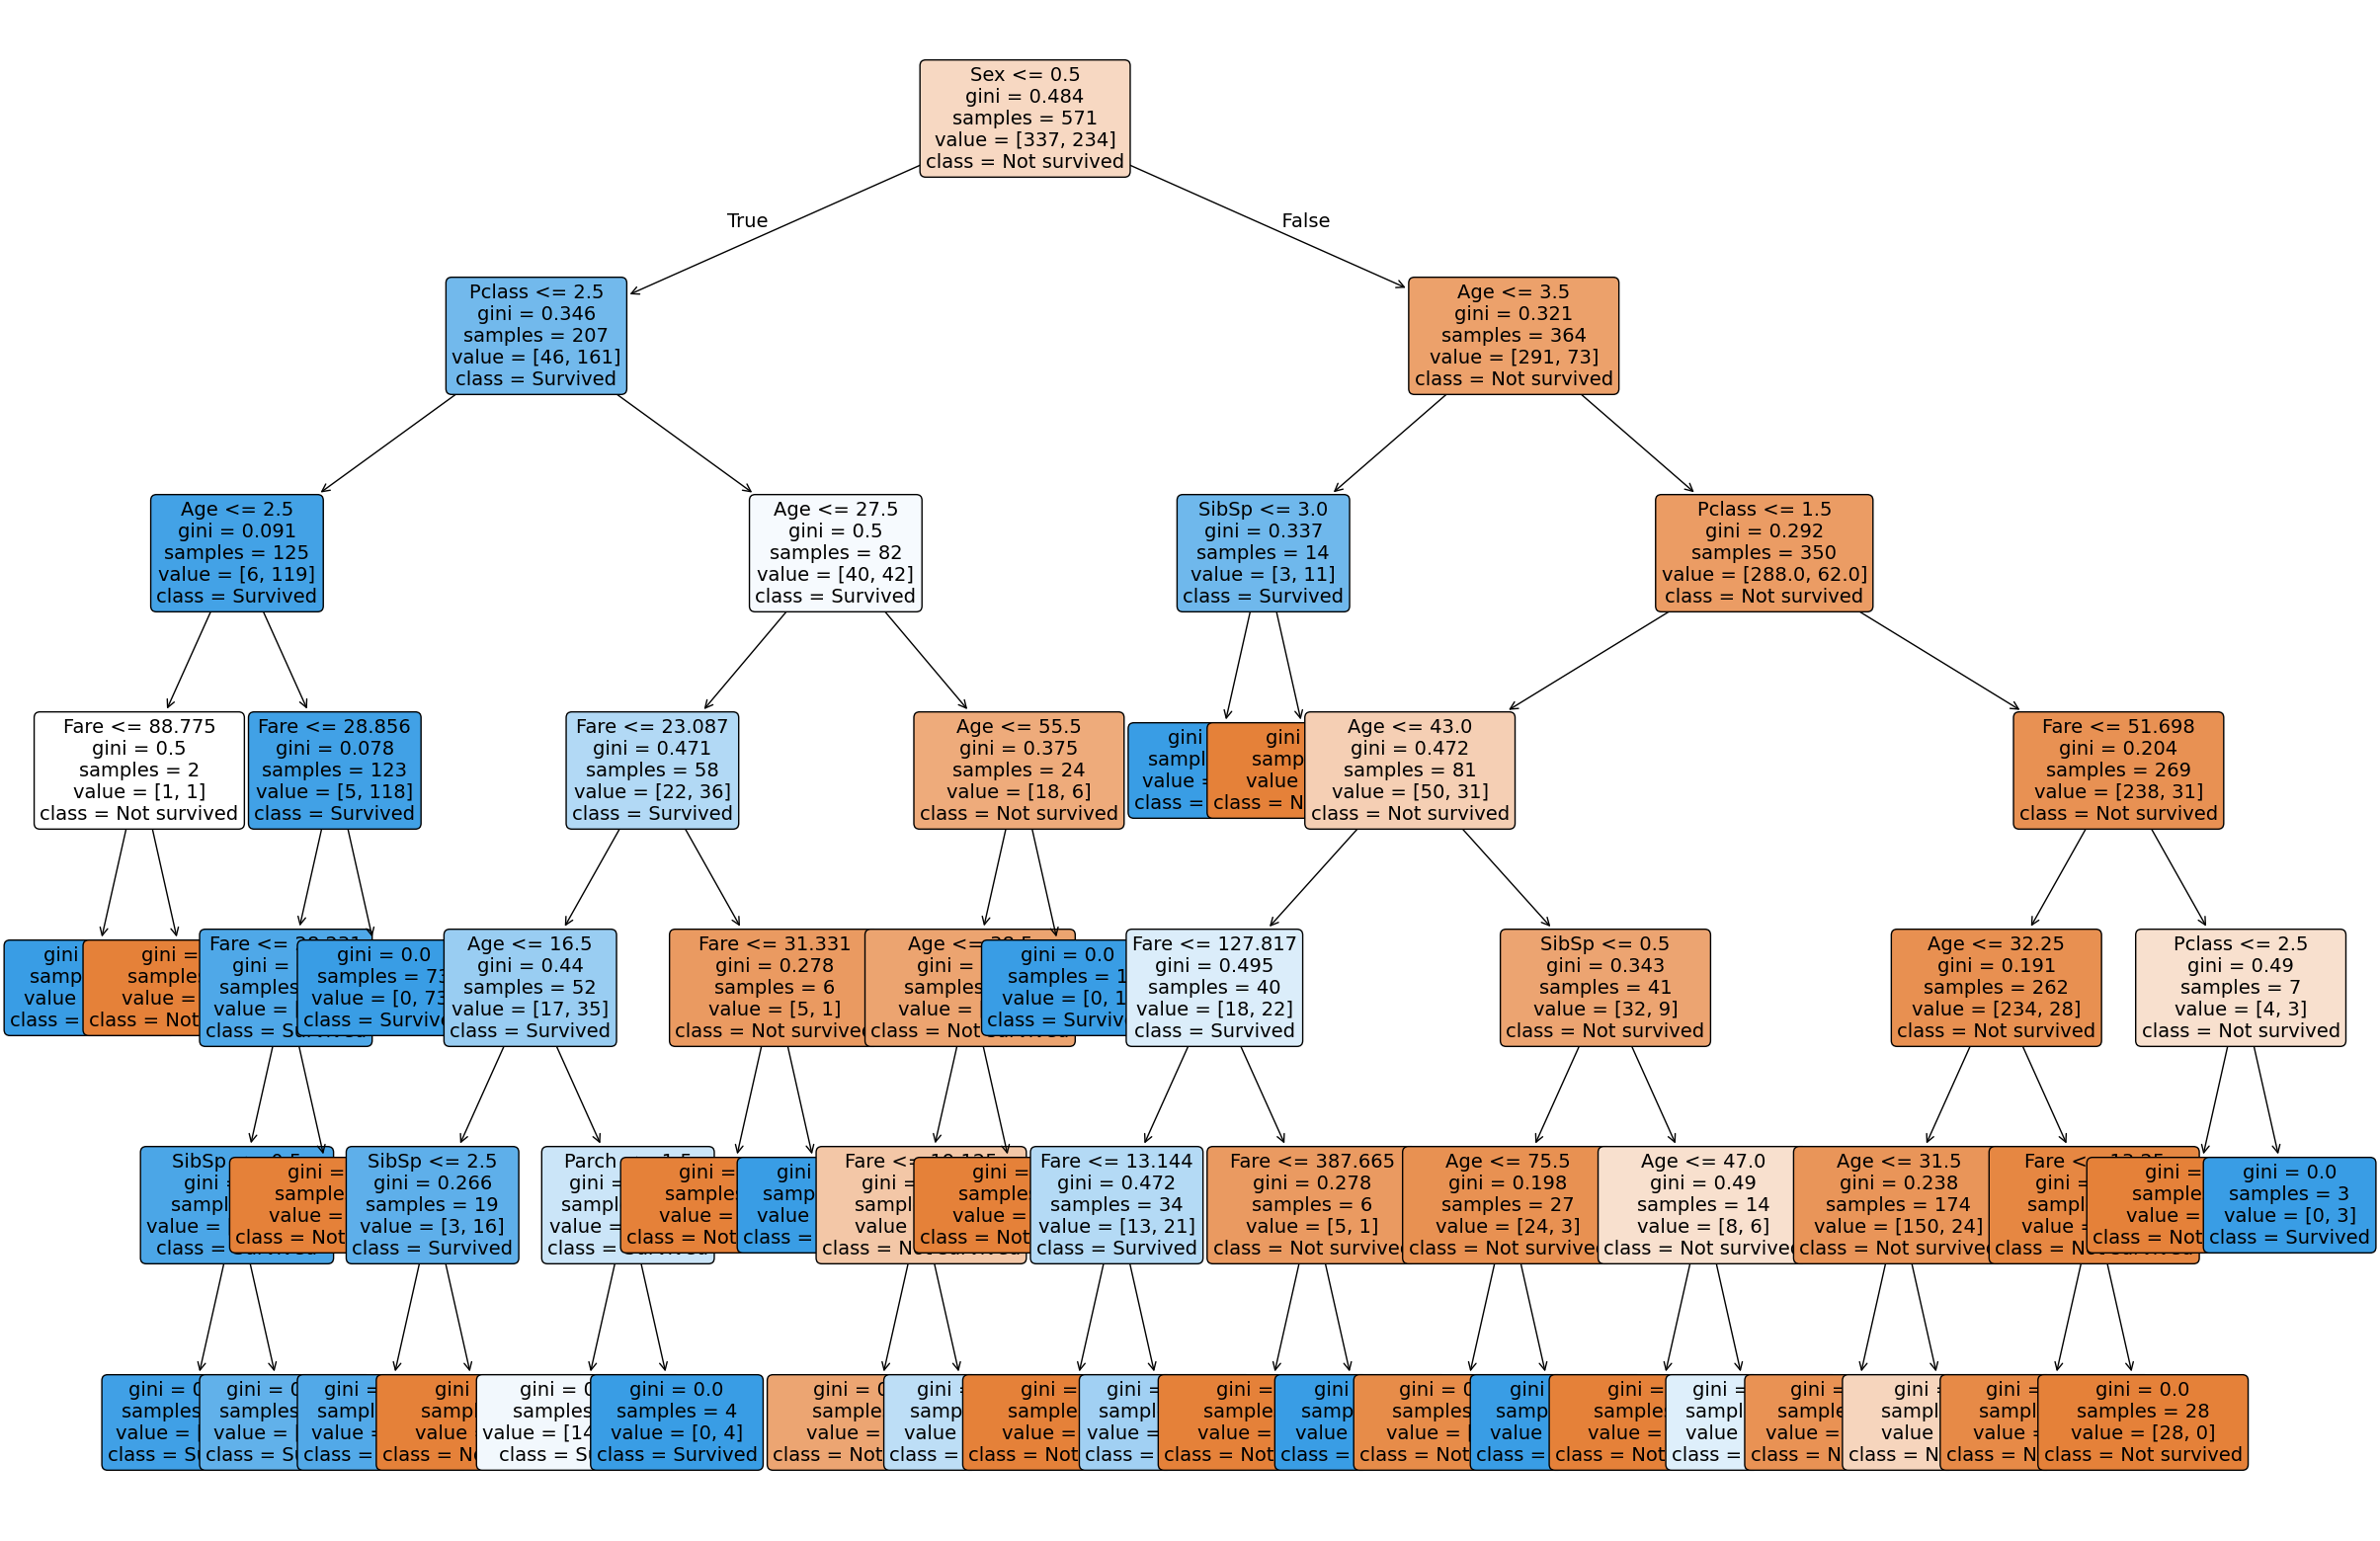

In [31]:
show_tree(model, X, ['Not survived', 'Survived'])

In [36]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=100, random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

y_score = model.predict_proba(X_test)[:, 1]

roc = roc_auc_score(y_test, y_score)


print('Acc', acc)
print('ROC AUC', roc)

Acc 0.7202797202797203
ROC AUC 0.7144909688013136


In [37]:
train_roc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print('Train ROC: ', train_roc)
print('Test Roc: ', test_roc)

Train ROC:  0.999816125187045
Test Roc:  0.7144909688013136


In [ ]:
show_tree(model, X, ['Not survived', 'Survived'], (50, 60))